In [1]:
#2 Installing Keras, Tensorflow and PyTorch
!pip install tensorflow keras torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
#3 CNNs on Computer Vision
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

print("Final Training Accuracy:", history.history['accuracy'][-1])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - accuracy: 0.3879 - loss: 1.6941 - val_accuracy: 0.5577 - val_loss: 1.2669
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.5670 - loss: 1.2372 - val_accuracy: 0.5655 - val_loss: 1.2597
Final Training Accuracy: 0.5706800222396851


In [3]:
#4 CNN on MNIST
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

print("Test Accuracy:", history.history['val_accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.9075 - loss: 0.3115 - val_accuracy: 0.9791 - val_loss: 0.0688
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9841 - loss: 0.0509 - val_accuracy: 0.9847 - val_loss: 0.0474
Test Accuracy: 0.9847000241279602


In [5]:
#5 Deep Learning for NLP LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# Sample text data
texts = ["I love programming", "Machine learning is amazing", "Deep learning is powerful"]
labels = np.array([1, 1, 1], dtype='float32')  # Ensure labels are numpy array

# Tokenization
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=5)

# Model definition
model = Sequential([
    Embedding(input_dim=1000, output_dim=64),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(padded_sequences, labels, epochs=5, verbose=1)

print("Final Accuracy:", history.history['accuracy'][-1])


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 0.6958
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.6872
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.6786
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.6700
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.6613
Final Accuracy: 1.0


In [6]:
#6 Sentiment Analysis LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Build the model
model = Sequential([
    Embedding(10000, 128),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

print("Validation Accuracy:", history.history['val_accuracy'][-1])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 112ms/step - accuracy: 0.7544 - loss: 0.4828 - val_accuracy: 0.8518 - val_loss: 0.3364
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 108ms/step - accuracy: 0.9017 - loss: 0.2526 - val_accuracy: 0.8580 - val_loss: 0.3457
Validation Accuracy: 0.8579599857330322


In [7]:
#7 Autoencoders on real-world data
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np

# Define input data
data = np.random.random((1000, 20))

# Autoencoder architecture
input_layer = Input(shape=(20,))
encoded = Dense(10, activation='relu')(input_layer)
decoded = Dense(20, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(data, data, epochs=5)

print("Final Training Loss:", history.history['loss'][-1])

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0859
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0828
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0809
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0800
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0800
Final Training Loss: 0.07879046350717545


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


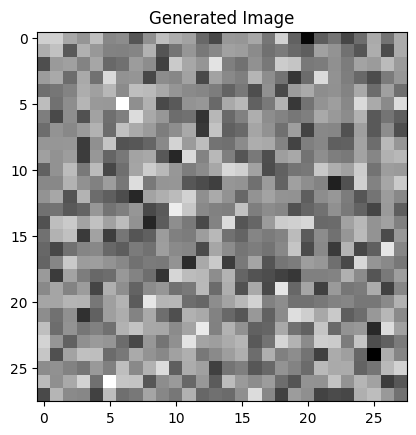

In [8]:
#8 GANs for Image Gen
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

# Generate random noise
def generate_latent_points(latent_dim, n_samples):
    return np.random.randn(latent_dim * n_samples).reshape(n_samples, latent_dim)

# Define generator
generator = Sequential([
    Dense(128, activation='relu', input_dim=100),
    Dense(784, activation='sigmoid'),
    Reshape((28, 28))
])

# Generate sample images
latent_points = generate_latent_points(100, 1)
generated_images = generator.predict(latent_points)

plt.imshow(generated_images[0], cmap='gray')
plt.title("Generated Image")
plt.show()